<a href="https://colab.research.google.com/github/rajshreefadikar/SPAMTRAP-MAILSWEEPER/blob/main/Filtering_spam_emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import io
emails = pd.read_csv(io.BytesIO(uploaded['emails.csv']))

In [ ]:
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
emails._get_value(58,'text')

'Subject: did you complete this ?  free service  mortgage rates have never been lower .  is your credit good ? get a loan beyond your wildest  expectations !  click here  your credit stinks ? lenders  will still give you an absolutely amazing loan .  click here  just click here and get started .  absolutely free quote .  click  here for quick details ! '

In [ ]:
emails.shape

(5728, 2)

In [ ]:
emails.groupby('spam').count()

,text
spam,
0,4360
1,1368


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


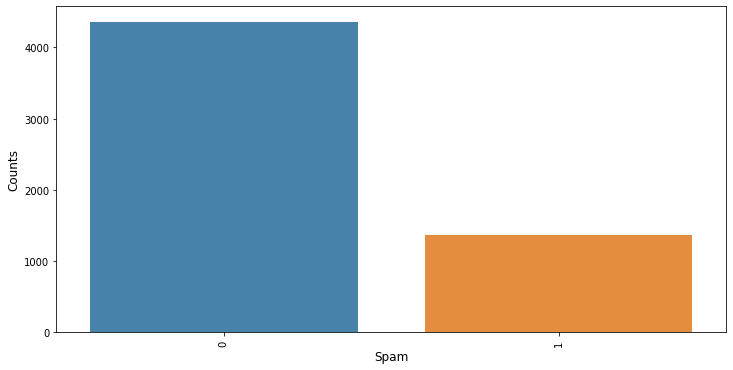

In [ ]:
label_counts = emails.spam.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()


In [ ]:
#to check if email length is coorelated to spam/ham
emails['length'] = emails['text'].map(lambda text: len(text))

emails.groupby('spam').length.describe()

,count,mean,std,min,25%,50%,75%,max
spam,,,,,,,,
0,4360.0,1631.918119,1959.664549,13.0,577.75,1122.0,2037.25,43952.0
1,1368.0,1317.257310,2271.372893,18.0,401.50,693.5,1250.25,28432.0


In [ ]:
   import nltk
   nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
emails['tokens'] = emails['text'].map(lambda text:  nltk.tokenize.word_tokenize(text)) 


In [ ]:
#check tokenized text from first email

print(emails['tokens'][1])

['Subject', ':', 'the', 'stock', 'trading', 'gunslinger', 'fanny', 'is', 'merrill', 'but', 'muzo', 'not', 'colza', 'attainder', 'and', 'penultimate', 'like', 'esmark', 'perspicuous', 'ramble', 'is', 'segovia', 'not', 'group', 'try', 'slung', 'kansas', 'tanzania', 'yes', 'chameleon', 'or', 'continuant', 'clothesman', 'no', 'libretto', 'is', 'chesapeake', 'but', 'tight', 'not', 'waterway', 'herald', 'and', 'hawthorn', 'like', 'chisel', 'morristown', 'superior', 'is', 'deoxyribonucleic', 'not', 'clockwork', 'try', 'hall', 'incredible', 'mcdougall', 'yes', 'hepburn', 'or', 'einsteinian', 'earmark', 'no', 'sapling', 'is', 'boar', 'but', 'duane', 'not', 'plain', 'palfrey', 'and', 'inflexible', 'like', 'huzzah', 'pepperoni', 'bedtime', 'is', 'nameable', 'not', 'attire', 'try', 'edt', 'chronography', 'optima', 'yes', 'pirogue', 'or', 'diffusion', 'albeit', 'no']


In [ ]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removing stop words

stop_words = set(nltk.corpus.stopwords.words('english'))
emails['filtered_text'] = emails['tokens'].map(lambda tokens: [w for w in tokens if not w in stop_words]) 

In [ ]:
emails['filtered_text'] = emails['filtered_text'].map(lambda text: text[2:])

In [ ]:
emails['filtered_text'] = emails['filtered_text'].map(lambda text: ' '.join(text))

#removing apecial characters from each mail 
emails['filtered_text'] = emails['filtered_text'].map(lambda text: re.sub('[^A-Za-z0-9]+', ' ', text))

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
 import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
wnl = nltk.WordNetLemmatizer()
emails['filtered_text'] = emails['filtered_text'].map(lambda text: wnl.lemmatize(text))

In [ ]:
emails['filtered_text'][4]

'money get software cds software compatibility great grow old along best yet tradgedies finish death comedies ended marriage '

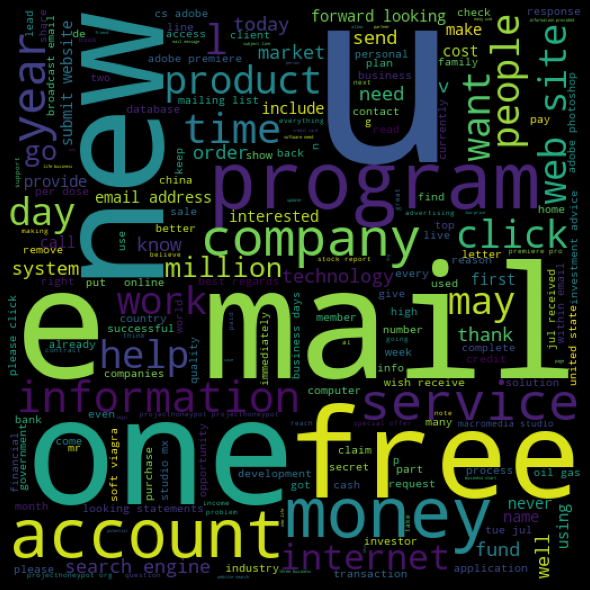

In [ ]:
spam_words = ''.join(list(emails[emails['spam']==1]['filtered_text']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

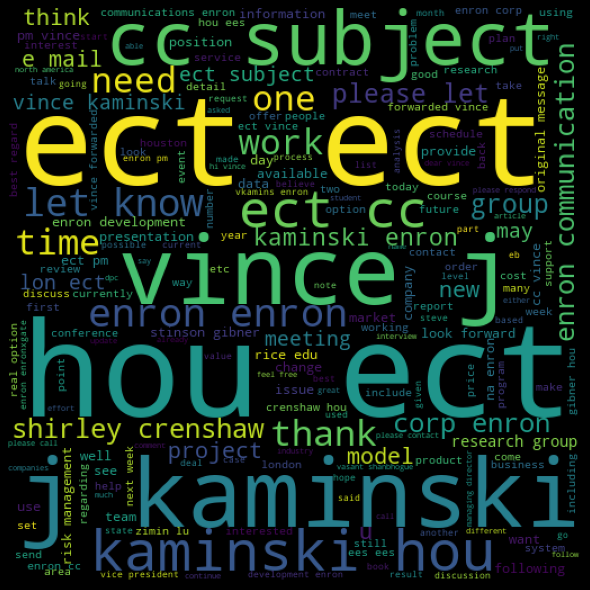

In [ ]:
spam_words = ''.join(list(emails[emails['spam']==0]['filtered_text']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
#bag of words
count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(emails['filtered_text'].values)

In [ ]:
print(counts.shape)

(5728, 37158)


In [ ]:
#classification
classifier = MultinomialNB()
targets = emails['spam'].values
classifier.fit(counts, targets)

MultinomialNB()

In [ ]:
examples = ['cheap Viagra', "Forwarding you minutes of meeting"]
example_counts = count_vectorizer.transform(examples)
predictions = classifier.predict(example_counts)

In [ ]:
print(predictions)

[1 0]


In [ ]:
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf = tfidf_vectorizer.transform(counts)

In [ ]:
print(tfidf.shape)


(5728, 37158)


In [ ]:
classifier = MultinomialNB()
targets = emails['spam'].values
classifier.fit(counts, targets)

MultinomialNB()

In [ ]:
examples = ['Free Offer Buy now',"Lottery from Nigeria","Please send the files"]
example_counts = count_vectorizer.transform(examples)
example_tfidf = tfidf_vectorizer.transform(example_counts)
predictions_tfidf = classifier.predict(example_tfidf)

In [ ]:
print(predictions_tfidf)

[1 1 0]
